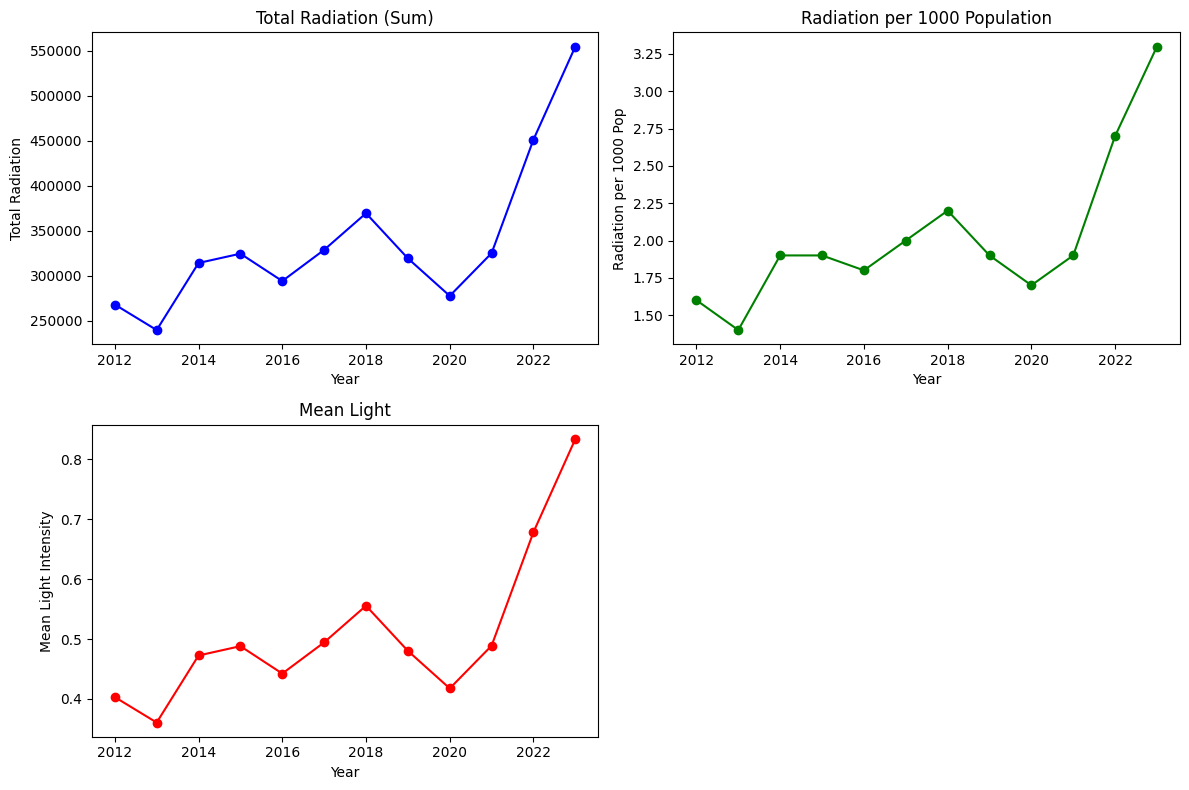

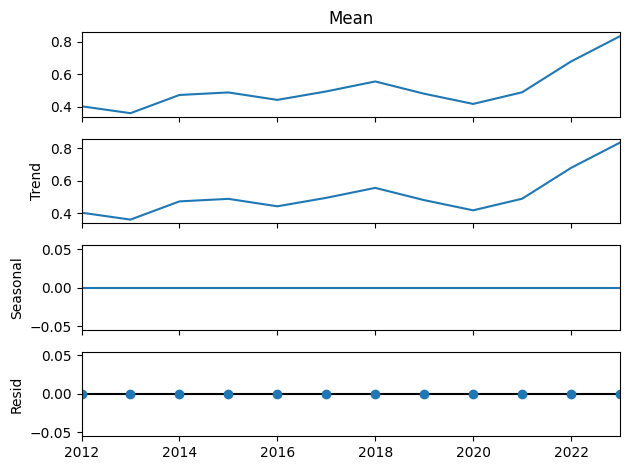

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

,predicted_mean
12,0.866934
13,0.869187
14,0.869341


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data setup
data = {
    "Year": list(range(2012, 2024)),
    "Pixel_count": [730070] * 12,
    "Sum": [267965, 239645, 314127, 324479, 294075, 328707, 369361, 319262, 277580, 325071, 451191, 554574],
    "Rad_per_1000_pop": [1.6, 1.4, 1.9, 1.9, 1.8, 2.0, 2.2, 1.9, 1.7, 1.9, 2.7, 3.3],
    "Mean": [0.4030, 0.3605, 0.4725, 0.4881, 0.4423, 0.4944, 0.5556, 0.4802, 0.4175, 0.4889, 0.6786, 0.8341]
}
df = pd.DataFrame(data)
df.set_index("Year", inplace=True)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df.index, df["Sum"], marker='o', linestyle='-', color='b')
plt.title("Total Radiation (Sum)")
plt.xlabel("Year")
plt.ylabel("Total Radiation")

plt.subplot(2, 2, 2)
plt.plot(df.index, df["Rad_per_1000_pop"], marker='o', linestyle='-', color='g')
plt.title("Radiation per 1000 Population")
plt.xlabel("Year")
plt.ylabel("Radiation per 1000 Pop")

plt.subplot(2, 2, 3)
plt.plot(df.index, df["Mean"], marker='o', linestyle='-', color='r')
plt.title("Mean Light")
plt.xlabel("Year")
plt.ylabel("Mean Light Intensity")

plt.tight_layout()
plt.show()

# Conducting time series decomposition for "Mean Light"
mean_series = df["Mean"]
decomposition = sm.tsa.seasonal_decompose(mean_series, model="additive", period=1)
decomposition.plot()
plt.show()

# Applying a simple forecast (ARIMA) model to forecast the "Mean Light"
model = sm.tsa.ARIMA(mean_series, order=(1,1,1))  # ARIMA model with differencing
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)  # Forecasting the next 3 years

forecast
